# Implementing gradient descent for minimizing square errors in linear regression model

In [1]:
# generate some linearish data
import numpy as np
m = 100
X = 2 * np.random.rand(m, 1)
y = 5 + 3 * X + np.random.randn(m, 1)

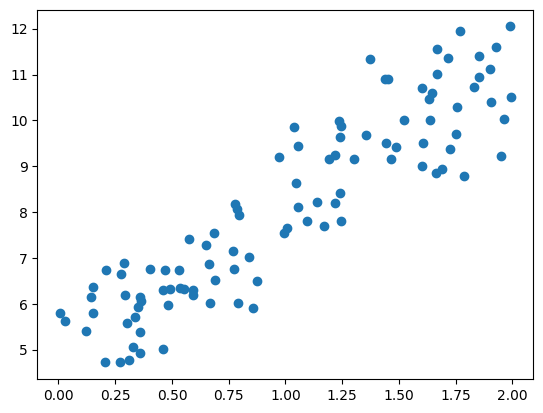

In [2]:
# check it out
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

### First compute the closed form solution to the problem
$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

In [5]:
# compute closed form solution to least squares problem
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add constant feature x0 = 1
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.62020644],
       [3.38933525]])

In [6]:
# make some predictions with this model
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_pred = X_new_b @ theta_best
y_pred

array([[ 4.62020644],
       [11.39887694]])

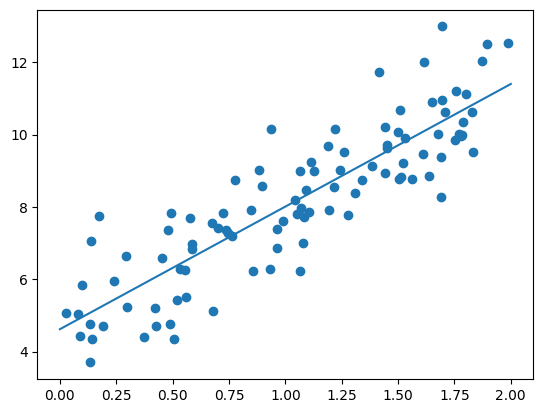

In [7]:
# plot the predictions
plt.plot(X_new, y_pred)
plt.scatter(X, y)
plt.show()

In [8]:
# do it directly with scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("theta_0: %s, theta_1: %s" % (lin_reg.intercept_, lin_reg.coef_))

theta_0: [4.62020644], theta_1: [[3.38933525]]


### Now try gradient descent
Partial derivatives for our case can be easily computed
$$
\frac{\partial{MSE(\theta)}}{\partial{\theta_0}} = \frac{2}{m}\sum_{i=1}^{m}[y_i-\theta_0-\theta_1 x_i][-1]
$$
$$
\frac{\partial{MSE(\theta)}}{\partial{\theta_1}} = \frac{2}{m}\sum_{i=1}^{m}[y_i-\theta_0-\theta_1 x_i][-x_i]
$$
More generally,
$$
\nabla_{\theta} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i) \nabla_{\theta} h_{\theta}(x_i)
$$

MSE before: [76.85258134]
MSE after: [1.07306929]
theta_0: [4.50127773], theta_1: [3.48808037]


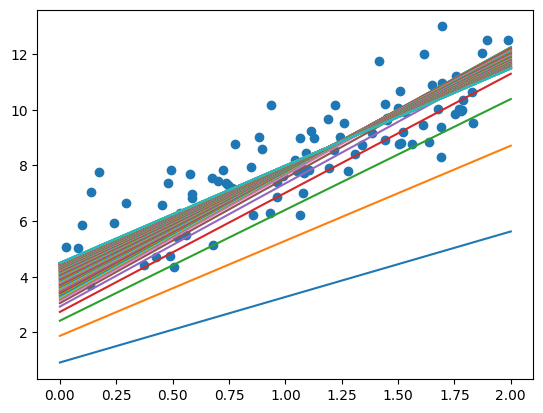

In [9]:
# batch gradient descent
eta = 0.1 # learning rate
n_epochs = 100
m = len(X_b)

def mse(X, y, theta):
    return (1 / m) * sum((theta[0] + theta[1] * X - y) ** 2)

theta0 = np.random.randn()
theta1 = np.random.randn()

print("MSE before: %s" % mse(X, y, [theta0, theta1]))

for epoch in range(n_epochs):
    pd0 = -1 * (2 / m) * sum(y - theta0 - theta1 * X)
    pd1 = -1 * (2 / m) * sum((y - theta0 - theta1 * X) * X)
    theta0 -= eta * pd0
    theta1 -= eta * pd1
    plt.plot([0, 2], [theta0, theta0 + 2 * theta1])

print("MSE after: %s" % mse(X, y, [theta0, theta1]))
print("theta_0: %s, theta_1: %s" % (theta0, theta1))

plt.scatter(X, y)
plt.show()

MSE before: [92.25923383]
MSE after: [1.07055501]
theta_0: 4.672700226484434, theta_1: 3.3439407389601463


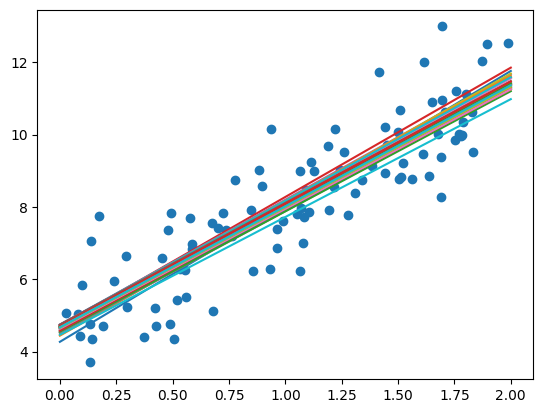

In [30]:
# stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule
def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2, 1)


print("MSE before: %s" % mse(X, y, [theta[0][0], theta[1][0]]))

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
    plt.plot([0, 2], np.array([[1, 0], [1, 2]]) @ theta)

print("MSE after: %s" % mse(X, y, [theta[0][0], theta[1][0]]))
print("theta_0: %s, theta_1: %s" % (theta[0][0], theta[1][0]))

plt.scatter(X, y)
plt.show()

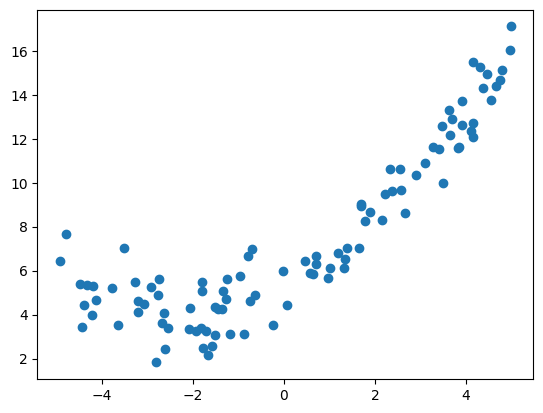

In [46]:
# Polynomial regression
# Use powers of features as features of new linear models
# first make some data

m = 100
X = 10 * np.random.rand(m, 1) - 5
y = 0.25 * X ** 2 + X + 5 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [47]:
# square the X values to a new feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.27542449]
[-1.27542449  1.62670762]


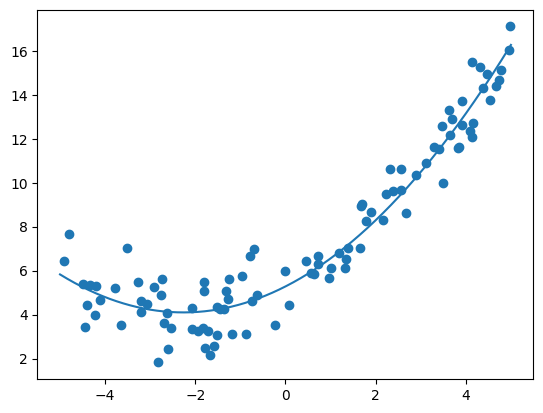

In [60]:
# train a linear model with the squared features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_l = np.linspace(-5, 5, 1000)
y_l = lin_reg.coef_[0][1] * X_l ** 2 + lin_reg.coef_[0][0] * X_l + lin_reg.intercept_

plt.scatter(X, y)
plt.plot(X_l, y_l)
plt.show()

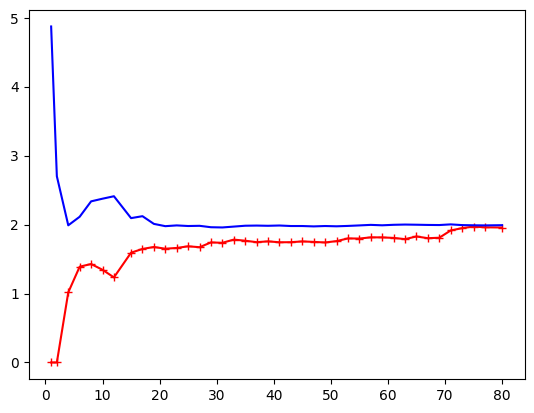

In [61]:
# using learning curves to find the appropriate degree 
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="train")
plt.plot(train_sizes, valid_errors, "b-", label="valid")
plt.show()

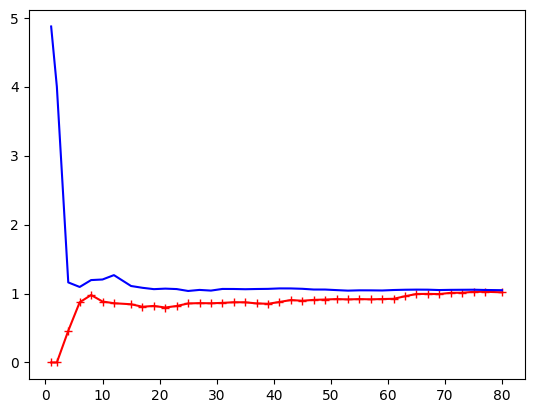

In [62]:
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_poly, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="train")
plt.plot(train_sizes, valid_errors, "b-", label="valid")
plt.show()

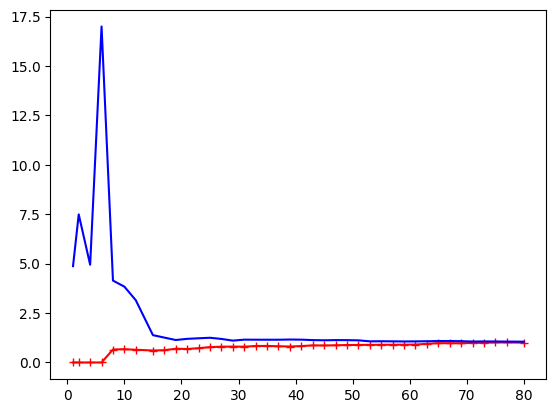

In [65]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_poly, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="train")
plt.plot(train_sizes, valid_errors, "b-", label="valid")
plt.show()

In [75]:
# Ridge regression: add a term to the loss function to incentivize lower parameters
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[2]])

array([[9.56887648]])

In [78]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[2]])

array([9.58843657])

In [83]:
# Early stopping gradient descent
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train, y_train, X_valid, y_valid = X[:70], y[:70], X[70:], y[70:]
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002)

n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

best_model.coef_, best_model.intercept_

(array([ 2.37007516e+00,  9.33557148e-01,  7.90512179e-01,  5.17669669e-01,
         2.19571170e-01,  2.44526007e-01,  1.05399085e-02,  9.34684999e-02,
        -6.59753637e-02,  1.53130390e-02, -8.88227632e-02, -2.27368485e-02,
        -8.95331126e-02, -3.95862795e-02, -8.18601015e-02, -4.55806167e-02,
        -7.18633495e-02, -4.61912506e-02, -6.20598418e-02, -4.42335938e-02,
        -5.33330075e-02, -4.11219713e-02, -4.58470138e-02, -3.75507013e-02,
        -3.94828828e-02, -3.38526134e-02, -3.40389583e-02, -3.01832407e-02,
        -2.93160566e-02, -2.66133790e-02, -2.51478405e-02, -2.31745007e-02,
        -2.14066205e-02, -1.98803897e-02, -1.79992930e-02, -1.67370430e-02,
        -1.48602870e-02, -1.37469527e-02, -1.19444966e-02, -1.09108082e-02,
        -9.22130237e-03, -8.22809281e-03, -6.66993200e-03, -5.69726258e-03,
        -4.27605168e-03, -3.31580695e-03, -2.02936479e-03, -1.08030660e-03,
         7.80184552e-05,  1.01347793e-03,  2.05264686e-03,  2.97048811e-03,
         3.9